# <center>Самостійна робота №5
## <center>Виконав: студент групи ПБ-21 мп Якобчук Євгеній
## <center>Варіант №5
## <center>Загальні завдання для всіх варіантів 

### 1. Завантажте навчальний набір даних. Сформуйте навчальну та тестову підмножини зображень. Самостійно визначте оптимальний розмір зображень та розмір батчу.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.regularizers import l2
from keras import utils
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt


In [17]:
BATCH_SIZE = 64
IMAGE_SIZE = (180, 180)

In [18]:
train_dataset = image_dataset_from_directory('E:/Магістр 1 курс 1 семестр/Інтелектуальні та інформаційні системи ІТ/Практикуми і самостійні/Пр5/sports/train',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.15,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

Found 360 files belonging to 2 classes.
Using 306 files for training.


In [19]:
validation_dataset = image_dataset_from_directory('E:/Магістр 1 курс 1 семестр/Інтелектуальні та інформаційні системи ІТ/Практикуми і самостійні/Пр5/sports/train',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.15,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

Found 360 files belonging to 2 classes.
Using 54 files for validation.


In [20]:
class_names = train_dataset.class_names
class_names

['basketball', 'football']

In [21]:
test_dataset = image_dataset_from_directory('E:/Магістр 1 курс 1 семестр/Інтелектуальні та інформаційні системи ІТ/Практикуми і самостійні/Пр5/sports/test',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

Found 20 files belonging to 2 classes.


In [22]:
test_dataset.class_names

['basketball', 'football']

### 2. Виведіть перші 9 зображень із сформованої навчальної підмножини.

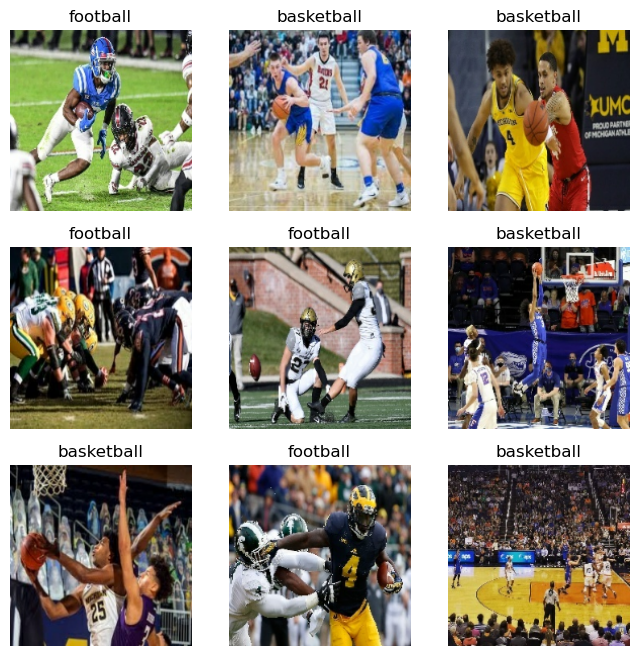

In [23]:
plt.figure(figsize=(8, 8))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### 3. Перевірте, чи правильно сформовано імена класів.

In [11]:
train_dataset.class_names

['basketball', 'football']

In [12]:
validation_dataset.class_names

['basketball', 'football']

In [13]:
test_dataset.class_names

['basketball', 'football']

### 4. Сформуйте множину тестових даних. Перевірте правильність імен класів на тестовій множині.

In [24]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [25]:
model = Sequential()
model.add(Rescaling(scale=1./255))
model.add(Conv2D(32, (5, 5), padding='same', input_shape=(180, 180, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
model.build((1, 180, 180,3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (1, 180, 180, 3)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (1, 180, 180, 32)         2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (1, 90, 90, 32)           0         
_________________________________________________________________
dropout_5 (Dropout)          (1, 90, 90, 32)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (1, 90, 90, 64)           18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (1, 45, 45, 64)           0         
_________________________________________________________________
dropout_6 (Dropout)          (1, 45, 45, 64)          

### 5. Створіть та навчіть згорткову нейронну мережу для розпізнавання двох класів об’єктів на зображеннях. Побудуйте графік навчання.

In [27]:
history = model.fit(train_dataset,validation_data=validation_dataset,epochs=25)

Epoch 1/25
5/5 [==============================] - 12s 2s/step - loss: 10.4978 - accuracy: 0.5784 - val_loss: 10.0317 - val_accuracy: 0.5556
Epoch 2/25
5/5 [==============================] - 9s 2s/step - loss: 9.7365 - accuracy: 0.6176 - val_loss: 9.3351 - val_accuracy: 0.6481
Epoch 3/25
5/5 [==============================] - 10s 2s/step - loss: 9.0275 - accuracy: 0.6732 - val_loss: 8.6545 - val_accuracy: 0.7037
Epoch 4/25
5/5 [==============================] - 10s 2s/step - loss: 8.3558 - accuracy: 0.6765 - val_loss: 8.0062 - val_accuracy: 0.6481
Epoch 5/25
5/5 [==============================] - 10s 2s/step - loss: 7.7268 - accuracy: 0.7157 - val_loss: 7.4059 - val_accuracy: 0.6667
Epoch 6/25
5/5 [==============================] - 9s 2s/step - loss: 7.1317 - accuracy: 0.7320 - val_loss: 6.8499 - val_accuracy: 0.7778
Epoch 7/25
5/5 [==============================] - 9s 2s/step - loss: 6.5972 - accuracy: 0.7157 - val_loss: 6.3396 - val_accuracy: 0.7593
Epoch 8/25
5/5 [===================

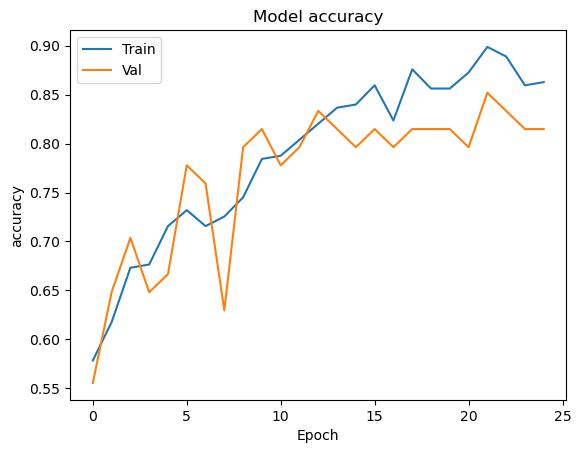

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### 6. Проведіть оцінку якості роботи навченої мережі на тестових даних.

In [29]:
scores = model.evaluate(test_dataset)
print("Доля вірних відповідей на тестових даних, у відсотках:", round(scores[1] * 100, 4))

1/1 [==============================] - 0s 992us/step - loss: 1.9944 - accuracy: 0.9000
Доля вірних відповідей на тестових даних, у відсотках: 90.0


### 7. Застосуйте навчену мережу для класифікації довільних зображень, які імпортуються в програму з жорсткого диску ПК.

In [3]:
from IPython.display import Image
from tkinter.filedialog import askopenfilename

(-0.5, 179.5, 179.5, -0.5)

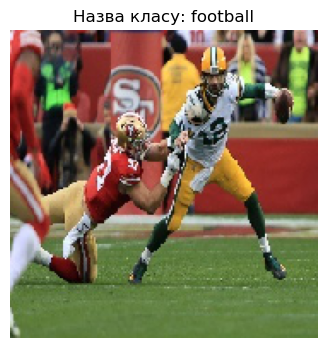

In [31]:
img_path = askopenfilename()
img = image.load_img(img_path, target_size=(180, 180))
x = image.img_to_array(img)
x = x.reshape(-1,180, 180, 3)
prediction = model.predict(x)
prediction = int(np.round(prediction))
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"Назва класу: {class_names[prediction]}" )
plt.axis("off")